In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import sklearn
sklearn.__version__

'0.24.1'

In [2]:
company = pd.read_csv("Company_Data.csv")

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


### performing EDA

In [5]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
company.shape

(400, 11)

In [8]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

###  Data preperation

In [9]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['US'].astype('category')

company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [10]:
label_encoder=preprocessing.LabelEncoder()
company['US']=label_encoder.fit_transform(company['US'])

In [11]:
label_encoder=preprocessing.LabelEncoder()
company['Urban']=label_encoder.fit_transform(company['Urban'])

In [12]:
label_encoder=preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])

In [13]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [14]:
company['Sales']=company['Sales'].map(lambda x:1 if x>8 else 0)
company['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [15]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [16]:
X=company.drop(labels='Sales',axis=1)
Y=company[['Sales']]

In [17]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [18]:
Y.head()

,Sales
0,1
1,1
2,1
3,0
4,0


In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=12)

In [20]:
X_train.shape, Y_train.shape

((320, 10), (320, 1))

In [21]:
X_test.shape, Y_test.shape

((80, 10), (80, 1))

### model training


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,max_depth=5)
rf_model.fit(X_train,Y_train)

<ipython-input-22-c556b9f6f1d9>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,Y_train)


RandomForestClassifier(max_depth=5)

In [23]:
rf_model = RandomForestClassifier( n_estimators=100)
rf_model.fit(X_train,Y_train)

<ipython-input-23-7f72c50dbfc3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,Y_train)


RandomForestClassifier()

### model testing

In [24]:
y_train_pred = rf_model.predict(X_train)

In [25]:
y_test_pred = rf_model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [27]:
accuracy_score(Y_train,y_train_pred)

1.0

In [28]:
confusion_matrix(Y_train,y_train_pred)

array([[187,   0],
       [  0, 133]], dtype=int64)

In [29]:
precision_score(Y_train,y_train_pred)

1.0

In [30]:
recall_score(Y_train, y_train_pred)

1.0

In [31]:
print(classification_report(Y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       133

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



1.0


Text(0, 0.5, 'True Positive Rate')

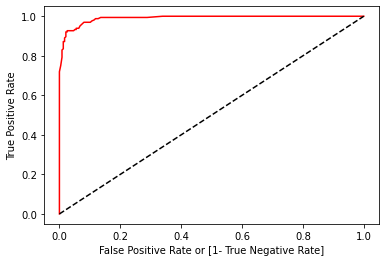

In [32]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(Y, rf_model.predict_proba (X)[:,1])

auc = roc_auc_score(Y_train,y_train_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red' , label='logit model ( area = %0.2f)'%auc)
plt.plot([0,1], [0,1] , 'k--')
plt.xlabel('False Positive Rate or [1- True Negative Rate]')
plt.ylabel('True Positive Rate')


### Testing data

In [33]:
accuracy_score(Y_test, y_test_pred)

0.775

In [34]:
confusion_matrix(Y_test,y_test_pred)

array([[44,  5],
       [13, 18]], dtype=int64)

In [35]:
precision_score(Y_test, y_test_pred)

0.782608695652174

In [36]:
recall_score(Y_test , y_test_pred)

0.5806451612903226

# Assignment 2 of RandomForest Fraud

In [37]:
fraud = pd.read_csv("Fraud_check.csv")

In [38]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [39]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [40]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [41]:
fraud.shape

(600, 6)

In [42]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [43]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [44]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [45]:
fraud['Undergrad'] = fraud['Undergrad'].astype('category')
fraud['Marital.Status'] = fraud['Marital.Status'].astype('category')
fraud['Urban'] = fraud['Urban'].astype('category')

In [46]:
fraud.dtypes

Undergrad          category
Marital.Status     category
Taxable.Income        int64
City.Population       int64
Work.Experience       int64
Urban              category
dtype: object

In [47]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])

In [48]:
label_encoder = preprocessing.LabelEncoder()
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])

In [49]:
label_encoder = preprocessing.LabelEncoder()
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

In [50]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [51]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [52]:
fraud.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0
599,0,0,96519,158137,16,0


In [53]:
fraud['Taxable.Income']=fraud['Taxable.Income'].map(lambda x:'risky' if x<30000 else 'good')

In [54]:
fraud['Taxable.Income'].unique()

array(['good', 'risky'], dtype=object)

In [55]:
label_encoder=preprocessing.LabelEncoder()
fraud['Taxable.Income']=label_encoder.fit_transform(fraud['Taxable.Income'])

In [56]:
X = fraud.drop("Taxable.Income",axis=1)
y = fraud['Taxable.Income']

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier( n_estimators=100,max_depth=5)
rf_model.fit(X_train, Y_train)

<ipython-input-57-56f776f880a6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, Y_train)


RandomForestClassifier(max_depth=5)

In [58]:
rf_model = RandomForestClassifier( n_estimators=100)
rf_model.fit(X_train,Y_train)

<ipython-input-58-7f72c50dbfc3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,Y_train)


RandomForestClassifier()

In [59]:
y_train_pred = rf_model.predict(X_train)

In [60]:
y_test_pred = rf_model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score,recall_score,classification_report

In [62]:
accuracy_score(Y_train,y_train_pred)

1.0

In [63]:
confusion_matrix(Y_train,y_train_pred)

array([[187,   0],
       [  0, 133]], dtype=int64)

In [64]:
precision_score(Y_train,y_train_pred)

1.0

In [65]:
recall_score(Y_train, y_train_pred)

1.0

In [66]:
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       133

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [67]:
accuracy_score(Y_test,y_test_pred)

0.775

In [68]:
confusion_matrix(Y_test,y_test_pred)

array([[45,  4],
       [14, 17]], dtype=int64)

In [69]:
precision_score(Y_test,y_test_pred)

0.8095238095238095

In [70]:
recall_score(Y_test,y_test_pred)

0.5483870967741935